In [99]:
# the following are all the required imports
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [100]:
# reading the file from the URL
# and displaying it
data_url= 'https://raw.githubusercontent.com/Customer-Churn-Prediction/Project-Machine-Learning/master/Churning.csv'
data = pd.read_csv(data_url)
data.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [101]:
# grouping all those states together whose Churning value = 1
State_Churn = data.query('Churn==1').groupby(['State']).size()

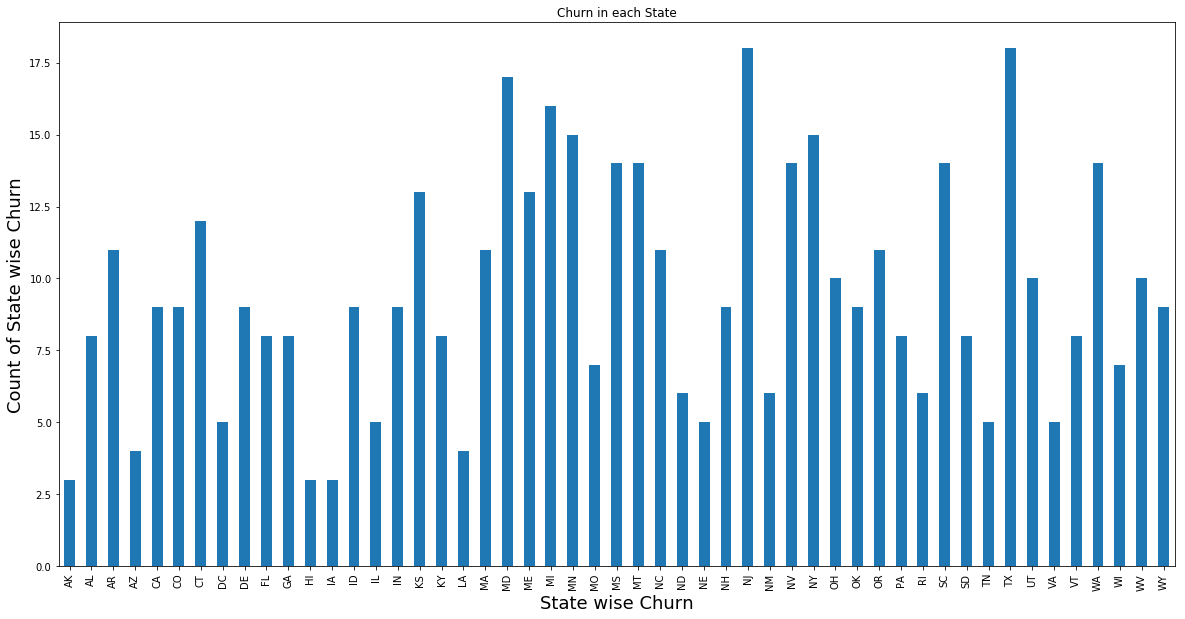

In [102]:
# plotting a histogram to find out the frequency of churning in each state
State_Churn.plot(kind='bar', figsize=(20,10))
plt.title('Churn in each State')
plt.xlabel('State wise Churn',fontsize=18)
plt.ylabel('Count of State wise Churn',fontsize=18)
plt.show()

In [103]:
# dropping unwanted columns like 'Phone Numbers', 'State Names', 'Area Code' 
# to increase accuracy
data = data.drop(['Churn','State','Area Code','Phone'], axis = 1)
data.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,28.34,122,12.61,121,8.41,3,2.73


In [105]:
# Performing K Fold cross-validation 
# Although test_train split is the more generic method of splitting
# the data into train and test sets, it posesess a drawback in the form of data
# loss,i.e, a data once used for test set cannot be utilised for train set.
# K-Fold Cross Validation removes this drawback and splits the data without
# any loss of data
data_matrix=data.as_matrix()
kf = KFold(n_splits=4)
kf.get_n_splits(data)

for train_index, test_index in kf.split(data):
    #print("TRAIN:", train_index, "TEST:", test_index)
    train_x, test_x = data_matrix[train_index], data_matrix[test_index]
    train_y, test_y = target[train_index], target[test_index]
    #print(len(test_x))
    #print(len(train_x))

In [107]:
# printing the result obtained from the K Fold Cross-Validation
print(len(test_y))
print(len(train_y))
print(len(test_x))
print(len(train_x))

833
2500
833
2500


In [108]:
# Storing all the column names as an array called features
features=data.columns[:18]
features

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Int'l Plan', 'VMail Plan', 'Day Calls',
       'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge',
       'Intl Calls', 'Intl Charge'],
      dtype='object')

In [85]:
#estim=[]
#estim.append(('clf',RandomForestClassifier(n_jobs=-1, random_state=0)))
#estim.append(('knn',KNeighborsClassifier(n_neighbors=5, n_jobs=-1, metric='euclidean')))
#model=Pipeline(estim)

In [86]:
clf = RandomForestClassifier(n_jobs=2,random_state=0)
clf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [87]:
preds = clf.predict(test_x)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [90]:
proba = clf.predict_proba(test_x)
proba

array([[ 0.9,  0.1],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       ..., 
       [ 0.9,  0.1],
       [ 0.8,  0.2],
       [ 0.7,  0.3]])

In [92]:
cnf_mat = confusion_matrix(test_y, preds)
cnf_mat

array([[696,   1],
       [ 48,  88]], dtype=int64)

In [93]:
pd.crosstab(np.array(test_y),preds, rownames=['Actual Churn'], colnames=['Predicted Churn'])

Predicted Churn,0,1
Actual Churn,,
0,696,1
1,48,88


In [95]:
list(zip(train_x,clf.feature_importances_))

[(array([ 128.  ,   25.  ,  265.1 ,  197.4 ,  244.7 ,   10.  ,    1.  ,
            0.  ,    1.  ,  110.  ,   45.07,   99.  ,   16.78,   91.  ,
           11.01,    3.  ,    2.7 ]), 0.028607329439959299),
 (array([ 107.  ,   26.  ,  161.6 ,  195.5 ,  254.4 ,   13.7 ,    1.  ,
            0.  ,    1.  ,  123.  ,   27.47,  103.  ,   16.62,  103.  ,
           11.45,    3.  ,    3.7 ]), 0.024238918936166857),
 (array([ 137.  ,    0.  ,  243.4 ,  121.2 ,  162.6 ,   12.2 ,    0.  ,
            0.  ,    0.  ,  114.  ,   41.38,  110.  ,   10.3 ,  104.  ,
            7.32,    5.  ,    3.29]), 0.097531125233582233),
 (array([  84.  ,    0.  ,  299.4 ,   61.9 ,  196.9 ,    6.6 ,    2.  ,
            1.  ,    0.  ,   71.  ,   50.9 ,   88.  ,    5.26,   89.  ,
            8.86,    7.  ,    1.78]), 0.062818104439723466),
 (array([  75.  ,    0.  ,  166.7 ,  148.3 ,  186.9 ,   10.1 ,    3.  ,
            1.  ,    0.  ,  113.  ,   28.34,  122.  ,   12.61,  121.  ,
            8.41,    3.  ,    2.73])

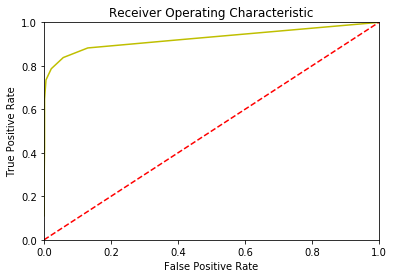

In [96]:
fpr, tpr, threshold = roc_curve(test_y,proba[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'y')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

,importance,labels
10,0.164849,Day Charge
6,0.127275,CustServ Calls
2,0.097531,Day Mins
12,0.076910,Eve Charge
15,0.063806,Intl Calls


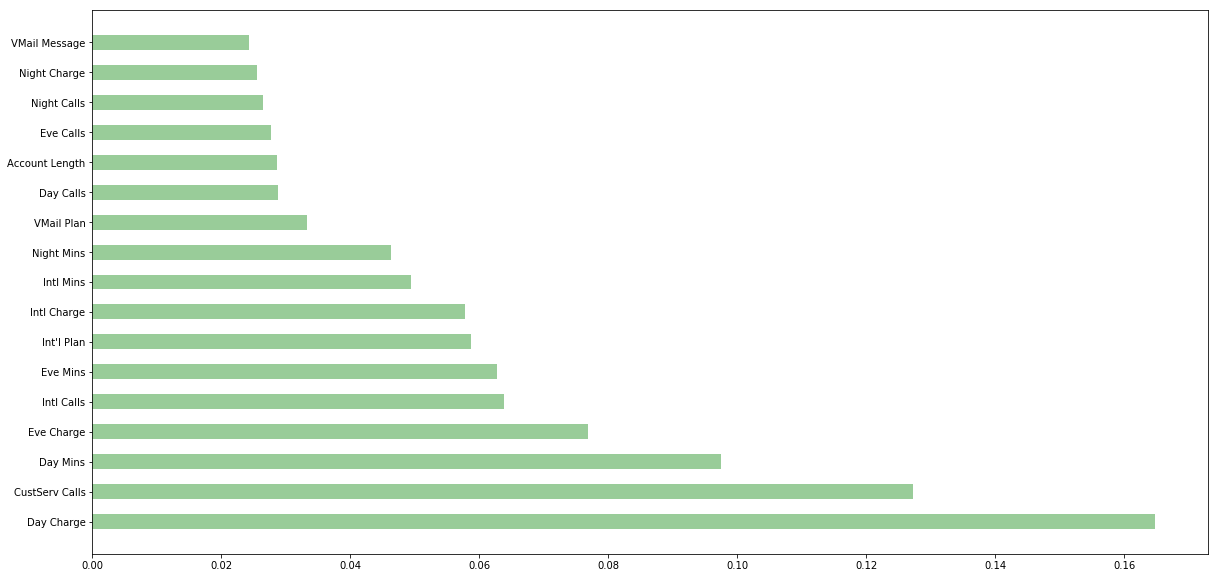

In [97]:
fig = plt.figure(figsize=(20, 10))
ax=fig.add_subplot(111)
df_f = pd.DataFrame (clf.feature_importances_,columns=["importance"])
df_f["labels"]=features
df_f.sort_values("importance",inplace=True,ascending=False)
display(df_f.head())

index=np.arange(len(clf.feature_importances_))
bar_width=0.5
rects= plt.barh(index, df_f["importance"],bar_width,alpha=0.4,color='g',label='Main')
plt.yticks(index,df_f["labels"])
plt.show()